# Cart (Recursive Implementation)

<img src="https://avatars0.githubusercontent.com/u/33459977?s=80&v=4" align="left"/>

---------------------------------------------------------------------------
About
=====

- **ARJUN MOHNOT**
- E17CSE102
- EB04
- Mobile: +91-7733993964
- [Website](https://arjun009.github.io)
- [WhatsApp](https://wa.me/917733993964?text=Hey%20Arjun%20Mohnot,%20I%27m%20contacting%20you%20from%20your%20Jupyter%20Notebook,%20A.I.-M.L.)
- [PlayStore](https://play.google.com/store/apps/developer?id=ARJUN+MOHNOT)

---------------------------------------------------------------------------

In [64]:
import pandas as pd
import numpy as np
from collections import Counter

In [65]:
openFile=pd.read_csv("DatasetOne.csv")
#openFile = openFile.drop('S.No', axis = 1)
openFile = openFile.drop('Day', axis = 1)
openFile = openFile.drop('Unnamed: 0', axis = 1)
dec_tree = dict()

colD=[i for i in openFile]
Yname=colD[-1]

In [66]:
openFile

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


# Gini Index

In [67]:
def giniCalculate(df,colD=colD):
    finals={}
    for i in colD[:-1]:
        counter=0
        values=df[i].unique().tolist()
        #print(values,"5678values")
        parentDic=dict(Counter(df[i]))
        totalElement=sum(parentDic.values())
        d={}
        for j in values:
            tempdf=df[df[i]==j]
            dic=dict(Counter(tempdf[Yname]))
           
            totalLength=sum(dic.values())
            index=0
            dicloop=list(dic.values())

            for k in dicloop:


                index+=pow((k/totalLength),2)


            d[j]=index

        for keys,values in parentDic.items():
        
            counter+=d[keys]*(values/totalElement)
        
        finals[i]=1-counter
        
   
    zipper=dict(sorted(finals.items(), key=lambda x: x[1]))

    for k,v in zipper.items():
        return k

    

output=[]

def cart(df):
    
    b=[i for i in df][:]
    
    if b==[]: return 0
        
    node=giniCalculate(df,b)
    #print(node)
    
    
    f = df[node].unique().tolist()
    dec_tree[node] = dict(zip(f, [0 for _ in range(len(f))]))
    for i, j in dec_tree[node].items():
        try:
            dfr = df[df[node] == i]
            dfr = dfr.drop(node, axis = 1)
            if len(dfr[Yname].unique().tolist())==1:
                dec_tree[node][i] =list(dfr[Yname].unique().tolist())[0]


            else:
                    
                node_inter = cart(dfr)
                dec_tree[node][i] = node_inter

        except Exception as e:
            pass
    
    return node

root = cart(openFile)
print(dec_tree, root)

    

{'Outlook': {'Sunny': 'Humidity', 'Overcast': 'Yes', 'Rain': 'Wind'}, 'Humidity': {'High': 'No', 'Normal': 'Yes'}, 'Wind': {'Weak': 'Yes', 'Strong': 'No'}} Outlook


# Creating Graph

In [68]:
di={}
for k,v in dec_tree.items():
    try:
        for i,o in v.items():
            if o in dec_tree:
                dec_tree[k][i]={o:dec_tree[o]}
    except:
        pass
#print(dec_tree)
        
for k,v in dec_tree.items():
    di[k]=v
    break
print(di)

{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


# Plotting Graph

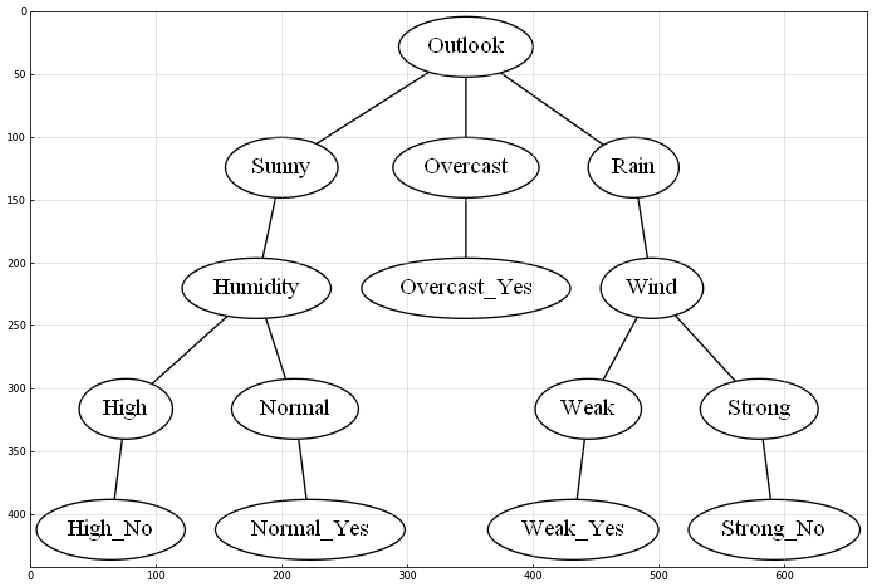

In [71]:
#import os
from matplotlib import pyplot as plt
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import pydot
from PIL import Image


menu = di
def draw(parent_name, child_name):
    edge = pydot.Edge(parent_name, child_name)
    graph.add_edge(edge)

def visit(node, parent=None):
    for k,v in node.items():
        if isinstance(v, dict):
            # We start with the root node whose parent is None
            # we don't want to graph the None node
            if parent:
                draw(parent, k)
            visit(v, k)
        else:
            draw(parent, k)
            # drawing the label using a distinct name
            draw(k, str(k)+'_'+str(v))

graph = pydot.Dot(graph_type='graph')
visit(menu)
graph.write_png('graph.png')

fname = 'graph.png'
image = Image.open(fname)
arr = np.asarray(image)
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (15, 15),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
plt.imshow(arr)
plt.show()

# Cart (Through Sklearn)

In [72]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split 

In [73]:
data = pd.read_csv('DatasetTwo.csv')
col=[i for i in data][2:]
print(col)
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('S.No', axis = 1)

data.head()
data.info()

['Branch', 'CGPA', 'Gamer', 'Movie_Fanatic', 'Committed?']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
Branch           15 non-null object
CGPA             15 non-null object
Gamer            15 non-null object
Movie_Fanatic    15 non-null object
Committed?       15 non-null object
dtypes: object(5)
memory usage: 680.0+ bytes


In [74]:
data[col[-1]],class_names = pd.factorize(data[col[-1]])

In [75]:
print(class_names)

Index(['No', 'Yes'], dtype='object')


In [76]:
for i in col[:-1]:
    data[i],_=pd.factorize(data[i])

data.head()

,Branch,CGPA,Gamer,Movie_Fanatic,Committed?
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,1,0,1
4,0,1,1,1,1


In [77]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [78]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [80]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2
Accuracy: 0.60


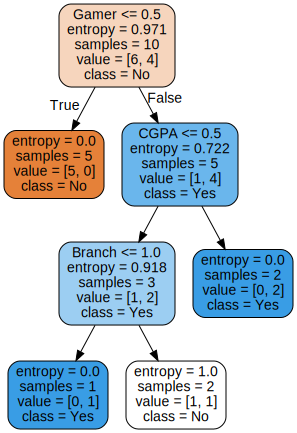

In [81]:
import graphviz
feature_names = X.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(dot_data)  


graph